In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [5]:
import requests

# Import the API key.
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1382488e5023aacb1eb34e928c7b95d7


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | bluff
Processing Record 2 of Set 13 | burica
City not found. Skipping...
Processing Record 3 of Set 13 | rikitea
Processing Record 4 of Set 13 | hermanus
Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | saint-philippe
Processing Record 7 of Set 13 | coquimbo
Processing Record 8 of Set 13 | yulara
Processing Record 9 of Set 13 | port-gentil
Processing Record 10 of Set 13 | narsaq
Processing Record 11 of Set 13 | marsa matruh
Processing Record 12 of Set 13 | aykhal
Processing Record 13 of Set 13 | san policarpo
Processing Record 14 of Set 13 | luderitz
Processing Record 15 of Set 13 | lebu
Processing Record 16 of Set 13 | kapaa
Processing Record 17 of Set 13 | avarua
Processing Record 18 of Set 13 | grindavik
Processing Record 19 of Set 13 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 13 | dobbs ferry
Processing Record 21 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 13 | hasaki
Pr

Processing Record 37 of Set 16 | dehloran
Processing Record 38 of Set 16 | shingu
Processing Record 39 of Set 16 | sri aman
Processing Record 40 of Set 16 | kipini
Processing Record 41 of Set 16 | cherskiy
Processing Record 42 of Set 16 | saskylakh
Processing Record 43 of Set 16 | havelock
Processing Record 44 of Set 16 | khatanga
Processing Record 45 of Set 16 | porto novo
Processing Record 46 of Set 16 | kavieng
Processing Record 47 of Set 16 | homer
Processing Record 48 of Set 16 | husavik
Processing Record 49 of Set 16 | nikolskoye
Processing Record 50 of Set 16 | velasco ibarra
Processing Record 1 of Set 17 | nuzvid
Processing Record 2 of Set 17 | pundaguitan
Processing Record 3 of Set 17 | fevralsk
City not found. Skipping...
Processing Record 4 of Set 17 | tyret pervaya
Processing Record 5 of Set 17 | quatre cocos
Processing Record 6 of Set 17 | tigil
Processing Record 7 of Set 17 | mount pleasant
Processing Record 8 of Set 17 | portsmouth
Processing Record 9 of Set 17 | jumla
P

Processing Record 20 of Set 20 | byron bay
Processing Record 21 of Set 20 | margate
Processing Record 22 of Set 20 | puerto baquerizo moreno
Processing Record 23 of Set 20 | sokoni
Processing Record 24 of Set 20 | boli
Processing Record 25 of Set 20 | gardner
Processing Record 26 of Set 20 | marsh harbour
Processing Record 27 of Set 20 | pangai
Processing Record 28 of Set 20 | wencheng
Processing Record 29 of Set 20 | salta
Processing Record 30 of Set 20 | achinsk
Processing Record 31 of Set 20 | labytnangi
Processing Record 32 of Set 20 | cuamba
Processing Record 33 of Set 20 | ibra
Processing Record 34 of Set 20 | asfi
Processing Record 35 of Set 20 | la ronge
Processing Record 36 of Set 20 | saint-pierre
Processing Record 37 of Set 20 | monrovia
Processing Record 38 of Set 20 | baruun-urt
Processing Record 39 of Set 20 | caravelas
Processing Record 40 of Set 20 | wangkui
Processing Record 41 of Set 20 | mata
Processing Record 42 of Set 20 | waddan
Processing Record 43 of Set 20 | gr

Processing Record 10 of Set 24 | ronne
Processing Record 11 of Set 24 | plettenberg bay
Processing Record 12 of Set 24 | andros town
Processing Record 13 of Set 24 | sao felix do xingu
Processing Record 14 of Set 24 | thompson
Processing Record 15 of Set 24 | verkhnyaya inta
Processing Record 16 of Set 24 | nguiu
City not found. Skipping...
Processing Record 17 of Set 24 | grand-santi
Processing Record 18 of Set 24 | teeli
Processing Record 19 of Set 24 | salamiyah
Processing Record 20 of Set 24 | nuuk
Processing Record 21 of Set 24 | barreirinha
Processing Record 22 of Set 24 | pierre
Processing Record 23 of Set 24 | mezimesti
Processing Record 24 of Set 24 | biak
Processing Record 25 of Set 24 | lahat
Processing Record 26 of Set 24 | acari
Processing Record 27 of Set 24 | ararat
Processing Record 28 of Set 24 | port said
Processing Record 29 of Set 24 | ossora
Processing Record 30 of Set 24 | sterlibashevo
Processing Record 31 of Set 24 | gat
Processing Record 32 of Set 24 | achisay


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-09-27 17:21:00,-46.60,168.33,33.01,94,95,1.99
1,Rikitea,PF,2020-09-27 17:21:06,-23.12,-134.97,74.10,82,35,12.57
2,Hermanus,ZA,2020-09-27 17:21:07,-34.42,19.23,50.00,75,15,4.63
3,Mataura,NZ,2020-09-27 17:21:04,-46.19,168.86,33.01,94,89,1.99
4,Saint-Philippe,RE,2020-09-27 17:21:20,-21.36,55.77,69.80,64,87,5.82
5,Coquimbo,CL,2020-09-27 17:22:00,-29.95,-71.34,59.00,67,0,11.41
6,Yulara,AU,2020-09-27 17:21:10,-25.24,130.99,77.00,13,40,5.82
7,Port-Gentil,GA,2020-09-27 17:22:35,-0.72,8.78,82.40,65,75,14.99
8,Narsaq,GL,2020-09-27 17:21:26,60.92,-46.05,42.80,38,20,2.24
9,Marsa Matruh,EG,2020-09-27 17:22:58,31.35,27.25,80.60,83,0,6.93


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/27/20'

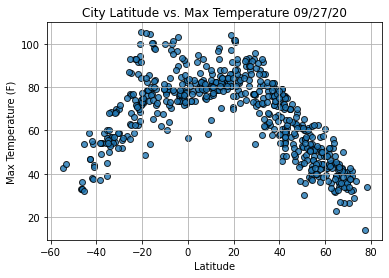

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

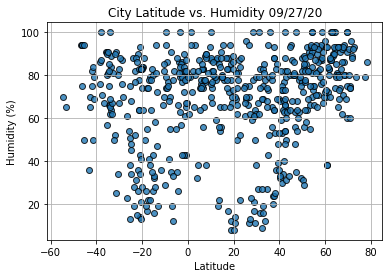

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

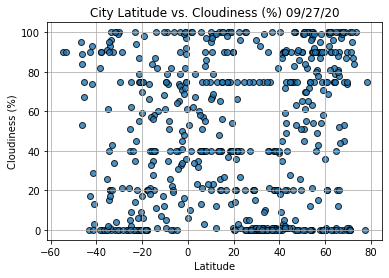

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()